### View JSON

In [1]:
import json

In [3]:
with open('/Users/sarfrazahmad/Developer/Research/Fact-Checking/urdu-fc-wip/datasets/processed/simpleqa/parts/simpleqa_gpt-4o_chunk_0.json', 'r', encoding='utf-8') as file:
    data = json.load(file)

In [4]:
len(data)

721

In [5]:
# remove entries from data list where question_urdu is false
filtered_data = [entry for entry in data if entry.get("question_urdu")]
len(filtered_data)

721

In [7]:
filtered_data[11]["question_urdu"]

"لیگو پارٹ جس کا ID 'gal56' ہے، وہ کون سے سال میں پہلی بار جاری ہوا؟"

In [15]:
# now sort the filtered data by id
sorted_data = sorted(filtered_data, key=lambda x: int(x['id']))

In [16]:
with open('/Users/sarfrazahmad/Developer/Research/Fact-Checking/urdu-fc-wip/datasets/processed/simpleqa/simpleqa_gpt-4o.json', "w", encoding="utf-8") as f:
    json.dump(sorted_data, f, ensure_ascii=False, indent=4)

In [5]:
# change data to df
import pandas as pd

df = pd.DataFrame(data)

In [7]:
df

,id,metadata,question,answer,question_urdu,answer_urdu
0,0,"{'topic': 'Science and technology', 'answer_ty...",Who received the IEEE Frank Rosenblatt Award i...,Michio Sugeno,فرینک روزن بلیٹ ایوارڈ کس کو دیا گیا؟ IEEE سال...,میشیو سوگینو
1,1,"{'topic': 'Science and technology', 'answer_ty...",Who was awarded the Oceanography Society's Jer...,Annick Bricaud,سال 2018 میں اوشیانوگرافی سوسائٹی کے جیرلوو ای...,انیک برکیوڈ
2,2,"{'topic': 'Geography', 'answer_type': 'Place',...",What's the name of the women's liberal arts co...,Radcliffe College,کیمبرج، میساچوسٹس میں خواتین کے لبرل آرٹس کالج...,ریڈکلف کالج
3,3,"{'topic': 'Sports', 'answer_type': 'Person', '...",In whose honor was the Leipzig 1877 tournament...,Adolf Anderssen,لیپزگ 1877 کے ٹورنامنٹ کو کس کے اعزاز میں منظم...,اڈولف اینڈرسن
4,4,"{'topic': 'Art', 'answer_type': 'Person', 'url...","According to Karl Küchler, what did Empress El...",Poet Henrich Heine.,False,False
...,...,...,...,...,...,...
4321,4321,"{'topic': 'Art', 'answer_type': 'Date', 'urls'...","The book ""Rhine"" by Anselm Kiefer is from what...",1981.,کتاب 'رائن' از آنزیلم کیفیر کس سال کی ہے؟,1981۔
4322,4322,"{'topic': 'Video games', 'answer_type': 'Perso...",What was the first and last name of the voice ...,Jodelle Ferland,ویڈیو گیم BioShock 2 (2010) میں لٹل سسٹرز کے ک...,جوڈیل فرلینڈ
4323,4323,"{'topic': 'Music', 'answer_type': 'Date', 'url...",What month and year was Miranda Lambert's albu...,October 2010,"میرانڈا لیمبرٹ کے البم ""ریولوشن"" کو RIAA کی طر...",اکتوبر 2010
4324,4324,"{'topic': 'Sports', 'answer_type': 'Date', 'ur...","Provide the day, month, and year Gazprom becam...",17th July 2012,گازپروم کب یوئیفا چیمپئنز لیگ 2012 کے فاتحین، ...,"جولائی 17, 2012"


#### Split Data

In [1]:
import json

In [2]:
with open('/Users/sarfrazahmad/Developer/Research/Fact-Checking/urdu-fc-wip/datasets/processed/simpleqa/simpleqa_gpt-4o.json', 'r', encoding='utf-8') as file:
    data = json.load(file)

In [3]:
len(data)

4326

In [7]:
chunks = [data[i:i + 721] for i in range(0, len(data), 721)]

In [12]:
for i, chunk in enumerate(chunks):
    with open(f'/Users/sarfrazahmad/Developer/Research/Fact-Checking/urdu-fc-wip/datasets/processed/simpleqa/parts/simpleqa_gpt-4o_chunk_{i}.json', 'w', encoding='utf-8') as f:
        json.dump(chunk, f, ensure_ascii=False, indent=4)

### View LangGraph

In [1]:
from IPython.display import Image

from graph_fewshot import graph

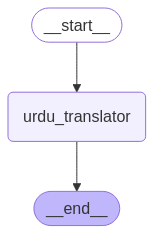

In [4]:
display(Image(graph.get_graph().draw_mermaid_png()))